In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error


# Tahmin ve gerçek değerleri yükle
y_true = np.load("y_true_model1.npy")
y_pred_model1 = np.load("y_pred_model1.npy")
y_pred_model2 = np.load("y_pred_model2.npy")

# Zaman ekseni
zaman = pd.date_range(start="2024-07-02", periods=len(y_true), freq="h")


# MAE ve MAPE
mae1 = mean_absolute_error(y_true, y_pred_model1)
mape1 = mean_absolute_percentage_error(y_true, y_pred_model1) * 100

mae2 = mean_absolute_error(y_true, y_pred_model2)
mape2 = mean_absolute_percentage_error(y_true, y_pred_model2) * 100



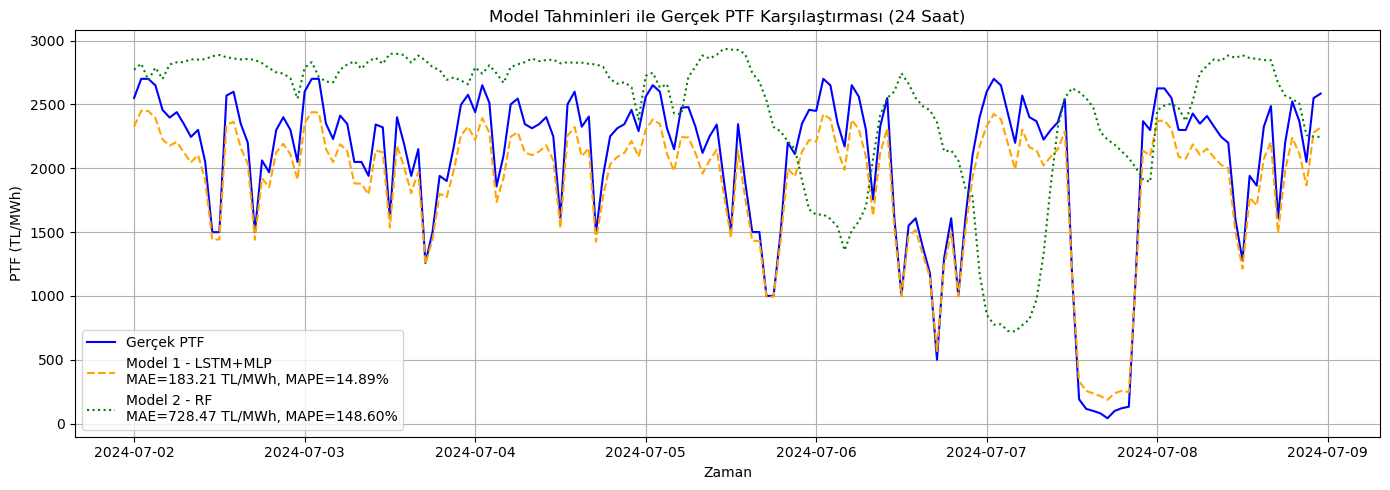

In [16]:
plt.figure(figsize=(14, 5))
plt.plot(zaman, y_true, label="Gerçek PTF", color="blue")
plt.plot(zaman, y_pred_model1, linestyle="--", color="orange",
         label=f"Model 1 - LSTM+MLP\nMAE={mae1:.2f} TL/MWh, MAPE={mape1:.2f}%")
plt.plot(zaman, y_pred_model2, linestyle=":", color="green",
         label=f"Model 2 - RF\nMAE={mae2:.2f} TL/MWh, MAPE={mape2:.2f}%")

plt.title("Model Tahminleri ile Gerçek PTF Karşılaştırması (24 Saat)")
plt.xlabel("Zaman")
plt.ylabel("PTF (TL/MWh)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


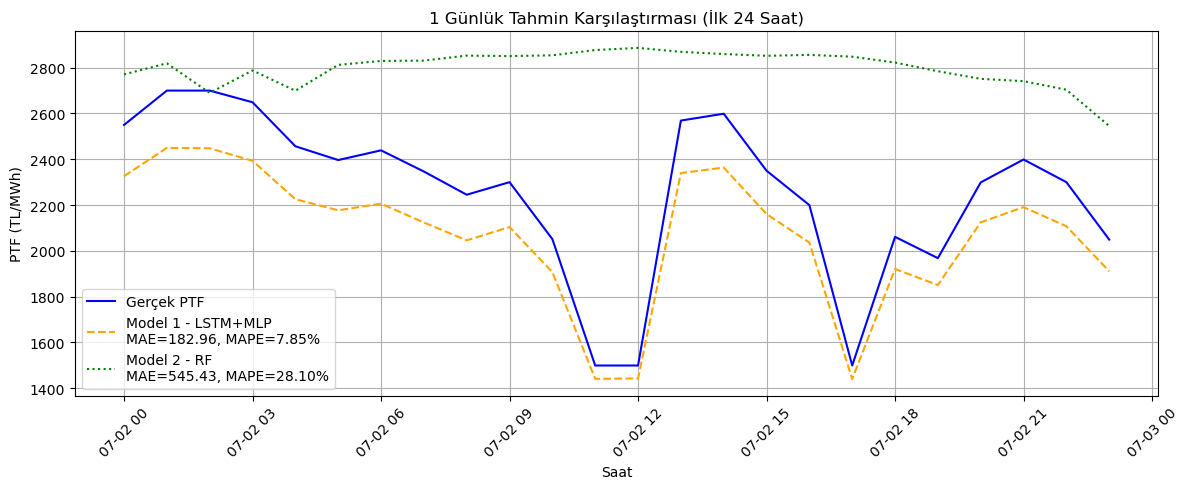

In [17]:
# Verileri yükle
y_true = np.load("y_true_model1.npy")[:24]
y_pred_model1 = np.load("y_pred_model1.npy")[:24]
y_pred_model2 = np.load("y_pred_model2.npy")[:24]

# MAE & MAPE (24 saatlik)
mae1 = mean_absolute_error(y_true, y_pred_model1)
mape1 = mean_absolute_percentage_error(y_true, y_pred_model1) * 100

mae2 = mean_absolute_error(y_true, y_pred_model2)
mape2 = mean_absolute_percentage_error(y_true, y_pred_model2) * 100

# Zaman ekseni (1 gün)
zaman = pd.date_range(start="2024-07-02", periods=24, freq="h")

# Grafik
plt.figure(figsize=(12, 5))
plt.plot(zaman, y_true, label="Gerçek PTF", color="blue")
plt.plot(zaman, y_pred_model1, linestyle="--", color="orange",
         label=f"Model 1 - LSTM+MLP\nMAE={mae1:.2f}, MAPE={mape1:.2f}%")
plt.plot(zaman, y_pred_model2, linestyle=":", color="green",
         label=f"Model 2 - RF\nMAE={mae2:.2f}, MAPE={mape2:.2f}%")

plt.title("1 Günlük Tahmin Karşılaştırması (İlk 24 Saat)")
plt.xlabel("Saat")
plt.ylabel("PTF (TL/MWh)")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


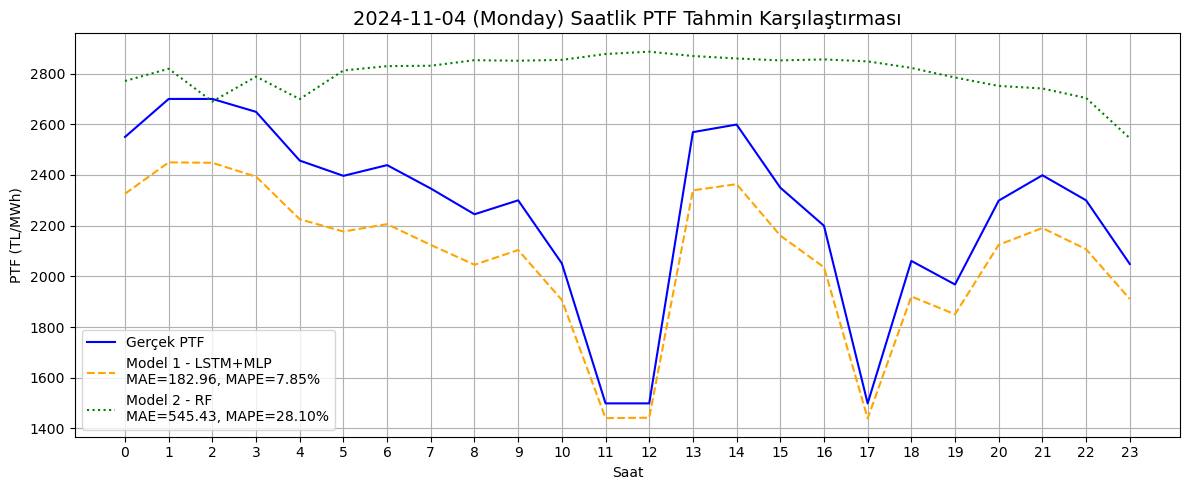

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

# 1 günlük veriyi al (ilk 24 saat)
y_true = np.load("y_true_model1.npy")[:24]
y_pred_model1 = np.load("y_pred_model1.npy")[:24]
y_pred_model2 = np.load("y_pred_model2.npy")[:24]

# MAE ve MAPE
mae1 = mean_absolute_error(y_true, y_pred_model1)
mape1 = mean_absolute_percentage_error(y_true, y_pred_model1) * 100

mae2 = mean_absolute_error(y_true, y_pred_model2)
mape2 = mean_absolute_percentage_error(y_true, y_pred_model2) * 100

# Zaman ekseni ve saatler
baslangic_tarihi = pd.to_datetime("2024-11-04")
saatler = list(range(24))
gun_bilgisi = baslangic_tarihi.strftime("%Y-%m-%d (%A)")  # Örn: 2024-07-02 (Tuesday)

# Grafik
plt.figure(figsize=(12, 5))
plt.plot(saatler, y_true, label="Gerçek PTF", color="blue")
plt.plot(saatler, y_pred_model1, linestyle="--", color="orange",
         label=f"Model 1 - LSTM+MLP\nMAE={mae1:.2f}, MAPE={mape1:.2f}%")
plt.plot(saatler, y_pred_model2, linestyle=":", color="green",
         label=f"Model 2 - RF\nMAE={mae2:.2f}, MAPE={mape2:.2f}%")

plt.title(f"{gun_bilgisi} Saatlik PTF Tahmin Karşılaştırması", fontsize=14)
plt.xlabel("Saat")
plt.ylabel("PTF (TL/MWh)")
plt.xticks(ticks=saatler)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
